
# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Standard plotly imports
import plotly.plotly as py
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# Using plotly + cufflinks in offline mode
import cufflinks as cf
cf.go_offline(connected=True)
init_notebook_mode(connected=True)

# Import Dataset

In [2]:
df=pd.read_csv("C:/DataScienceProjects/20190703 Client subscriptions/3. Uploaded Data/subsappdata.csv")

In [3]:
df.head(5)

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMcount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


# Pre-Processing

In [4]:
response = df['enrolled']
df = df.drop (columns=['enrolled'])

In [5]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (df, response,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [6]:
# Remove the user identifier column (which has no prediction power) and save it for later use
train_identifier = X_train['user']
X_train=X_train.drop(columns=['user'])
test_identifier = X_test['user']
X_test = X_test.drop(columns=['user'])

In [7]:
# Normalizing dataset while keeping features columns name and index
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))

#Copying columns name
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

#Copying index
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

C:\Users\astei\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

C:\Users\astei\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

C:\Users\astei\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.



# Model building

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
clf = LogisticRegression(random_state=0, penalty = 'l1',solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
y_pred =clf.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test,y_pred)

In [12]:
accuracy_score(y_test,y_pred)

0.7681

In [13]:
precision_score(y_test,y_pred)

0.7618952017667135

In [14]:
recall_score(y_test,y_pred)

0.7700892857142857

In [15]:
f1_score(y_test,y_pred)

0.7659703300030276

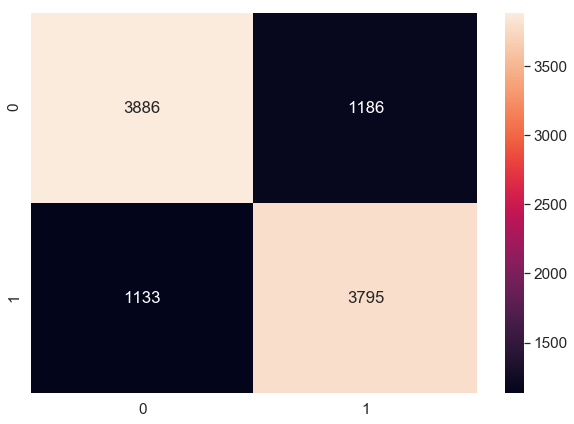

In [20]:
#PLotting confusion matrix
df_cm = pd.DataFrame (cm, index = (0,1), columns = (0,1))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap (df_cm, annot = True, fmt = 'g')
None

In [24]:
#Performing a cross_validation test to make sure the model is not overfitting. Although, we have a strong idea this is not the case based on previous metrics
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = clf, X = X_train, y = y_train, cv = 10)
print ("logistic Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

logistic Accuracy: 0.767 (+/- 0.010)


# Formatting results

In [29]:
final_results = pd.concat([y_test,test_identifier], axis=1).dropna()
final_results['predicted_results']=y_pred
final_results[['user','enrolled','predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
5,65042,1,0
6,207226,1,1
7,363062,0,0
8,152296,1,1
9,64484,0,0


# Conclusion

# Optionnal: Model explanation

In [31]:
# Permutation importance
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(clf, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1148 ± 0.0064,Other
0.0685 ± 0.0055,VerifyPhone
0.0402 ± 0.0013,CMcount
0.0176 ± 0.0062,LoansCount
0.0112 ± 0.0019,VerifyMobile
0.0106 ± 0.0030,VerifyCountry
0.0038 ± 0.0022,Alerts
0.0022 ± 0.0006,ResendToken
0.0016 ± 0.0024,idscreen
0.0011 ± 0.0013,ProfilePage


In [33]:
X_test

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMcount,CCCount,LoansCount
11841,-1.489818,-1.553579,0.856728,0.819520,-0.346830,-0.457453,2.246319,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.296641,-0.260877,-0.763372,-0.289185,-1.165789
19602,0.972325,-0.881364,-0.528611,0.564865,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,0.753543,-0.260877,-0.763372,-0.289185,0.309800
45519,-1.489818,0.328622,0.487305,-0.644744,-0.346830,2.186018,-0.445173,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.332655,-0.260877,0.057524,-0.289185,1.785389
25747,0.972325,0.866394,-0.990390,-0.517417,-0.346830,-0.457453,2.246319,-1.039218,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,0.481993,-0.260877,-0.763372,-0.289185,-1.165789
42642,0.972325,-1.553579,-0.159187,0.692193,-0.346830,-0.457453,-0.445173,-1.039218,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.604204,1.857638,-0.763372,2.962372,-1.165789
31902,0.479896,1.000837,0.210237,2.411111,-0.346830,-0.457453,-0.445173,0.962262,1.550753,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,0.210444,1.151466,-0.763372,-0.289185,0.309800
30346,-0.997389,-1.150250,-1.082746,0.310211,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.839740,-0.260877,-0.763372,-0.289185,0.309800
12363,0.972325,0.731951,-0.528611,-0.199099,-0.346830,-0.457453,-0.445173,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.061105,-0.260877,0.057524,-0.289185,1.785389
32490,-1.489818,0.597508,-0.620967,1.265165,-0.346830,-0.457453,-0.445173,0.962262,1.550753,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.568191,1.857638,2.520213,-0.289185,0.309800
26128,-0.012532,0.059736,1.410864,-1.154053,-0.346830,-0.457453,2.246319,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.690401,-0.260877,-0.763372,1.336593,0.309800
